In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
import seaborn as sns

### Đọc toàn bộ dữ liệu

In [130]:
dataset = pd.read_pickle('data/train/cars.pkl')
dataset["Năm sản xuất"] = 2024 - dataset["Năm sản xuất"]
dataset.rename(columns={"Năm sản xuất": "Tuối xe"}, inplace=True)
print(dataset.shape)
dataset.head()

(25582, 15)


,Tên hãng xe,Tuối xe,Tỉnh,Số Km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Màu ngoại thất,Màu nội thất,Số chỗ ngồi,Số cửa,Dẫn động,Loại động cơ,Dung tích,Giá
0,audi,4,TP HCM,30.0,Nhập khẩu,Sedan,Số tự động,Đen,Đen,5,4,AWD,Xăng,3.0,2950.0
1,audi,10,Hà Nội,94.0,Nhập khẩu,Sedan,Số tự động,Xanh,Nâu,5,4,FWD,Xăng,2.0,560.0
2,audi,8,TP HCM,50.0,Nhập khẩu,Sedan,Số tự động,Đen,Đen,5,4,FWD,Xăng,2.0,690.0
3,audi,8,Hà Nội,76.0,Nhập khẩu,Crossover,Số tự động,Xanh,Đen,5,5,AWD,Xăng,2.0,699.0
4,audi,8,Hà Nội,90.0,Nhập khẩu,SUV,Số tự động,Trắng,Kem,5,5,AWD,Xăng,2.0,739.0


In [131]:
import pandas as pd
from scipy import stats

def remove_outliers(dataset):
    # Xác định các cột số
    numeric_columns = ['Giá', 'Số Km đã đi']
    
    # Loại bỏ outliers bằng phương pháp Z-score
    for col in numeric_columns:
        z_scores = stats.zscore(dataset[col])
        abs_z_scores = abs(z_scores)
        filtered_entries = (abs_z_scores < 3)
        dataset = dataset[filtered_entries]
    
    print("Dataset shape after removing outliers:", dataset.shape)
    
    return dataset

# Giả sử dataset đã được đọc trước đó, ví dụ:
# dataset = pd.read_pickle('data/train/cars.pkl')

# Sử dụng hàm để loại bỏ outliers
dataset = remove_outliers(dataset)

# Hiển thị thông tin dataset sau khi xử lý
print(dataset.shape)
print(dataset.head())


Dataset shape after removing outliers: (25041, 15)
(25041, 15)
  Tên hãng xe  Tuối xe    Tỉnh  Số Km đã đi    Xuất xứ  Kiểu dáng      Hộp số  \
0        audi        4  TP HCM         30.0  Nhập khẩu      Sedan  Số tự động   
1        audi       10  Hà Nội         94.0  Nhập khẩu      Sedan  Số tự động   
2        audi        8  TP HCM         50.0  Nhập khẩu      Sedan  Số tự động   
3        audi        8  Hà Nội         76.0  Nhập khẩu  Crossover  Số tự động   
4        audi        8  Hà Nội         90.0  Nhập khẩu        SUV  Số tự động   

  Màu ngoại thất Màu nội thất  Số chỗ ngồi  Số cửa Dẫn động Loại động cơ  \
0            Đen          Đen            5       4      AWD         Xăng   
1           Xanh          Nâu            5       4      FWD         Xăng   
2            Đen          Đen            5       4      FWD         Xăng   
3           Xanh          Đen            5       5      AWD         Xăng   
4          Trắng          Kem            5       5      AWD         Xă

In [132]:
X = dataset.drop(columns=['Giá'], axis=1)
y = dataset['Giá']

Khai báo seed, test size để chia dữ liệu huấn luyện, kiểm thử giống nhau

In [133]:
SPLIT_SEED = 99
TEST_SIZE = .25

### Thiết kế hàm đánh giá mô hình dự đoán giá trị

Sử dụng 3 metrics chính để đánh giá sự hiệu quả của mô hình dự đoán:
- Mean Squared Error (MSE): Trung bình bình phương sai số, MSE càng nhỏ, mô hình càng tốt
- Mean Absolute Error (MAE): Trung bình giá trị tuyệt đối sai số. MAE càng nhỏ, mô hình càng tốt
- $R^2$ Score: Hệ số xác định, thể hiện mức độ phù hợp của mô hình với dữ liệu, giá trị nằm trong khoảng (0, 1)
$R^2 = 1 - \frac{SSR}{TSS}$ với SSR(sum of squared residuals): tổng bình phương sai số, và TSS(total sum of squares): tổng bình phương sự khác biệt giá trị thực tế và giá trị trung bình, $R^2 Score$ càng gần 1, thì mô hình giải thích tốt sự biến đổi trong dữ liệu

In [134]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error

def evaluate(y_pred, y_test):
    np.set_printoptions(precision=0)
    values = np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), 1)
    print(values)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    max_err = max_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R^2 Score: {r2}")
    print(f"Max Error: {max_err}")

    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
    plt.show()
    return mse, mae, r2

### Thiết kế baseline bằng mô hình Linear Regression đơn giản

Mã hóa dữ liệu danh mục bằng LabelEncoder

In [135]:
from sklearn.preprocessing import LabelEncoder

def encode_label(dataset: pd.DataFrame, columns: List[str]) -> pd.DataFrame:
    dataset_encoded = dataset
    le = LabelEncoder()
    for col in columns:
        dataset_encoded[col] = le.fit_transform(dataset[col])
    return dataset_encoded

X_encoded = encode_label(
    X, 
    columns=[
        "Tên hãng xe", "Tỉnh", "Xuất xứ", "Kiểu dáng", "Hộp số", 
        "Màu ngoại thất", "Màu nội thất", "Dẫn động", "Loại động cơ"]
)
X_encoded

,Tên hãng xe,Tuối xe,Tỉnh,Số Km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Màu ngoại thất,Màu nội thất,Số chỗ ngồi,Số cửa,Dẫn động,Loại động cơ,Dung tích
0,1,4,1,30.0,1,6,1,14,14,5,4,1,2,3.0
1,1,10,0,94.0,1,6,1,12,8,5,4,2,2,2.0
2,1,8,1,50.0,1,6,1,14,14,5,4,2,2,2.0
3,1,8,0,76.0,1,3,1,12,14,5,5,1,2,2.0
4,1,8,0,90.0,1,5,1,9,5,5,5,1,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26401,26,2,0,10.0,1,6,1,9,8,5,4,1,2,2.0
26402,26,2,0,13.0,1,6,1,9,8,5,4,1,2,2.0
26403,26,2,0,3.0,1,5,1,9,8,7,5,1,1,2.0
26404,26,3,0,50.0,1,6,1,13,14,5,4,1,2,2.0


Chia dữ liệu huấn luyện, kiểm thử

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=TEST_SIZE, random_state=SPLIT_SEED)
print(len(X_train), len(X_test))

18780 6261


Fit mô hình Linear Regression

[[1630. 1069.]
 [1491. 2549.]
 [1005.  979.]
 ...
 [ 905. 1750.]
 [1647. 1779.]
 [-399.  468.]]
Mean Squared Error: 476002.8873440358
Mean Absolute Error: 474.7988663438559
R^2 Score: 0.545324349341159
Max Error: 6930.783960406714


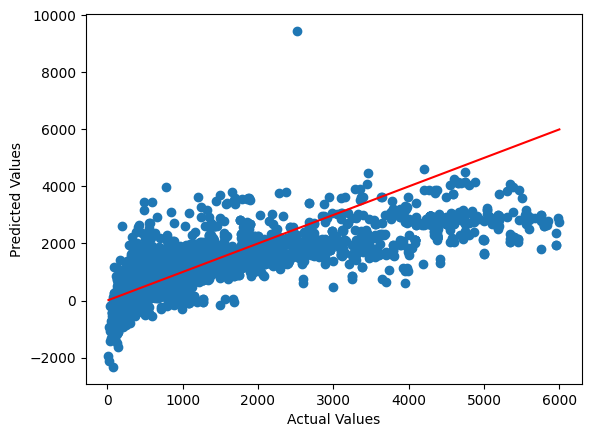

In [137]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
_ = evaluate(y_pred, y_test.values)

## Ridge Regression (L2 Regularization)

[[1630. 1069.]
 [1491. 2549.]
 [1005.  979.]
 ...
 [ 905. 1750.]
 [1647. 1779.]
 [-399.  468.]]
Mean Squared Error: 476002.7248991755
Mean Absolute Error: 474.7978263780275
R^2 Score: 0.5453245045077022
Max Error: 6930.666114286529


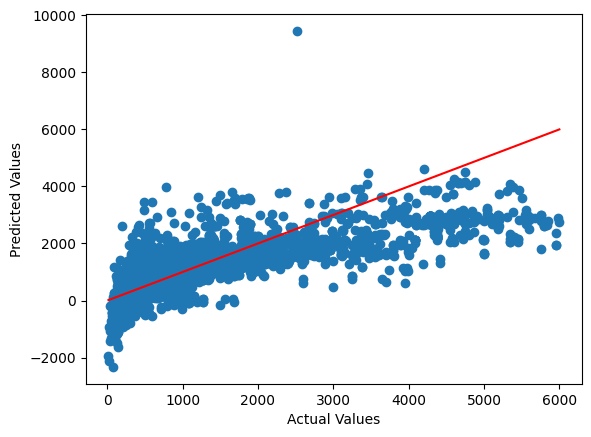

In [138]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha=0.1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
_ = evaluate(y_pred, y_test.values)

## Lasso Regression (L1 Regularization)

[[1630. 1069.]
 [1491. 2549.]
 [1006.  979.]
 ...
 [ 905. 1750.]
 [1647. 1779.]
 [-398.  468.]]
Mean Squared Error: 476005.04522678134
Mean Absolute Error: 474.7382325121126
R^2 Score: 0.5453222881420204
Max Error: 6925.841786047922


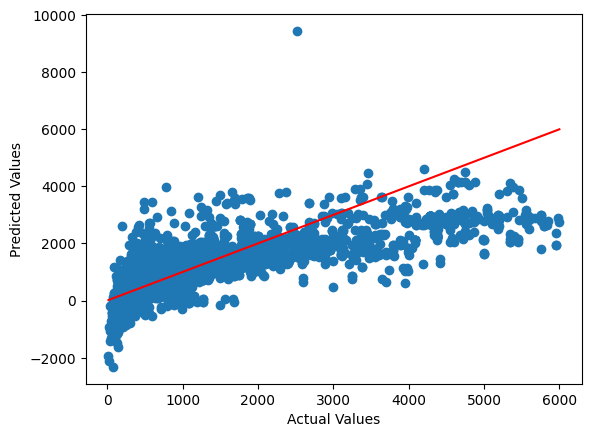

In [139]:
from sklearn.linear_model import Lasso

regressor = Lasso(alpha=0.1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
_ = evaluate(y_pred, y_test.values)

## Decision Tree Regression

[[1150. 1069.]
 [2649. 2549.]
 [ 819.  979.]
 ...
 [1750. 1750.]
 [1979. 1779.]
 [ 699.  468.]]
Mean Squared Error: 34093.65793977473
Mean Absolute Error: 65.71116110017974
R^2 Score: 0.9674339031983579
Max Error: 3132.0


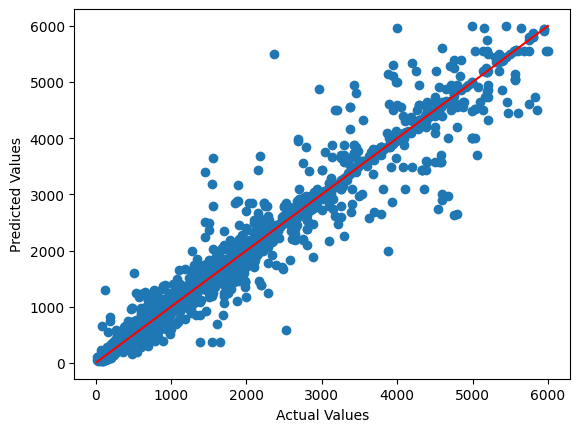

In [140]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
_ = evaluate(y_pred, y_test.values)

In [141]:
regressor.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Random Forest Regression

[[1137. 1069.]
 [2513. 2549.]
 [ 880.  979.]
 ...
 [1671. 1750.]
 [1952. 1779.]
 [ 559.  468.]]
Mean Squared Error: 22477.297577313733
Mean Absolute Error: 60.37201660826016
R^2 Score: 0.9785297943085144
Max Error: 1856.37


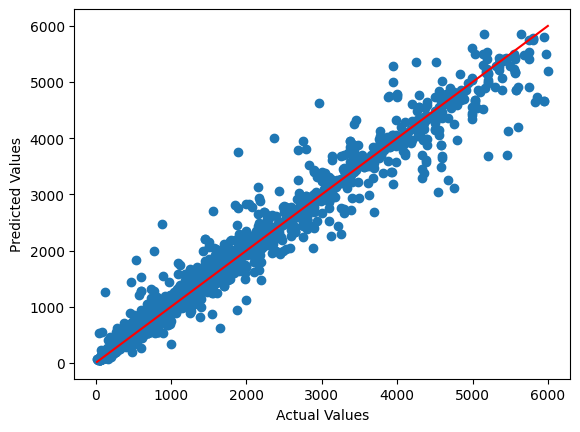

In [142]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
_ = evaluate(y_pred, y_test.values)

Tối ưu hóa Random Forest bằng GridSearch

In [143]:
# from sklearn.model_selection import GridSearchCV
# params = {
#     "criterion": ["squared_error", "friedman_mse", "poisson"],

# }
# regressor = RandomForestRegressor(random_state=1, n_estimators=100)

# optimizer = GridSearchCV(regressor, params, cv=5, n_jobs=-1, verbose=2)
# optimizer.fit(X_train.values, y_train.values)
# y_pred = optimizer.predict(X_test)
# _ = evaluate(y_pred, y_test.values)

In [144]:
# regressor = RandomForestRegressor(
#     random_state=1,
#     criterion="poisson",
#     n_estimators=100,
#     max_leaf_nodes=16,
#     min_samples_split=10,
#     min_samples_leaf=10,
# )
# regressor.fit(X_train, y_train)

In [145]:
# regressor.feature_importances_

In [146]:
# feature_imp = pd.Series(
#     regressor.feature_importances_, index=X_train.columns
# ).sort_values(ascending=False)
# print(feature_imp)
# sns.barplot(x=feature_imp, y=feature_imp.index)
# # Add labels to your graph
# plt.xlabel("Feature Importance Score")
# plt.ylabel("Features")
# plt.title("Visualizing Important Features")

## K-Nearest Neighbors (KNN)

[[ 986. 1069.]
 [1894. 2549.]
 [ 868.  979.]
 ...
 [1675. 1750.]
 [1989. 1779.]
 [ 722.  468.]]
Mean Squared Error: 74366.11431879891
Mean Absolute Error: 112.73590480753873
R^2 Score: 0.9289658480780782
Max Error: 4065.0


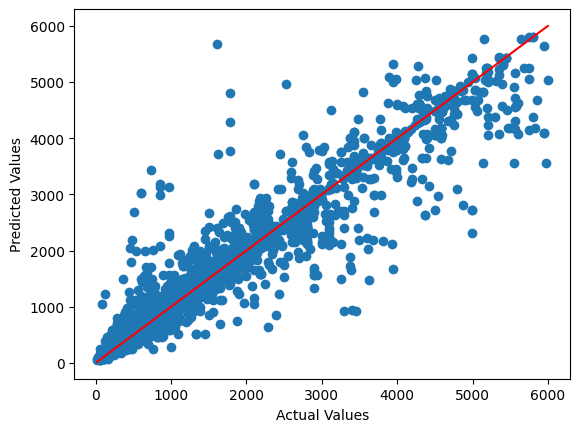

In [147]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

regressor = KNeighborsRegressor(n_neighbors=4)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
_ = evaluate(y_pred, y_test.values)

## Support Vector Regression

[[ 976. 1069.]
 [ 912. 2549.]
 [ 712.  979.]
 ...
 [ 845. 1750.]
 [ 907. 1779.]
 [ 703.  468.]]
Mean Squared Error: 846483.1816316171
Mean Absolute Error: 437.8094177205915
R^2 Score: 0.1914433680694274
Max Error: 4968.591422129877


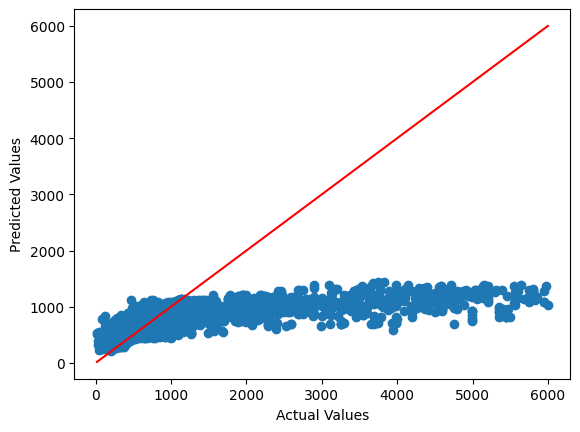

In [148]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
_ = evaluate(y_pred, y_test.values)

## Gradient Boosting Regression

[[1403. 1069.]
 [2021. 2549.]
 [ 884.  979.]
 ...
 [1771. 1750.]
 [2089. 1779.]
 [ 353.  468.]]
Mean Squared Error: 101071.34336001087
Mean Absolute Error: 183.9714100601795
R^2 Score: 0.9034571427463594
Max Error: 3186.190246780427


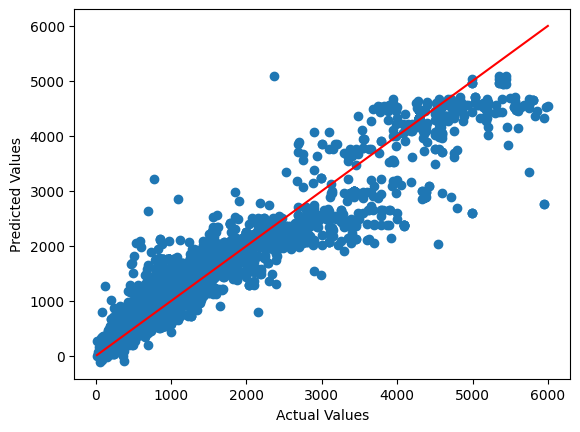

In [149]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
_ = evaluate(y_pred, y_test.values)

### Bagging

[[1138. 1069.]
 [2499. 2549.]
 [ 868.  979.]
 ...
 [1674. 1750.]
 [1939. 1779.]
 [ 565.  468.]]
Mean Squared Error: 33252.65438644637
Mean Absolute Error: 75.78268554757435
R^2 Score: 0.9682372257158945
Max Error: 1886.15


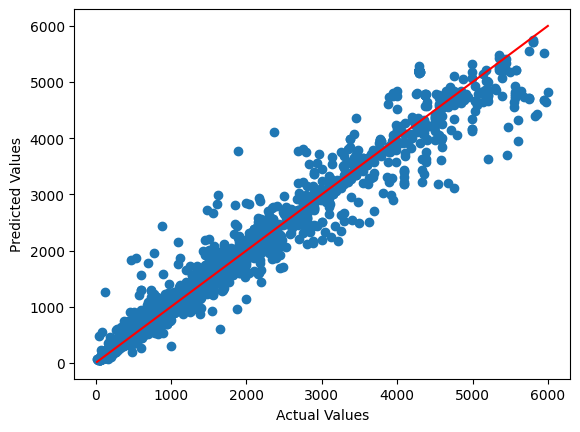

In [150]:
from sklearn.ensemble import BaggingRegressor

regressor = DecisionTreeRegressor()
bagging = BaggingRegressor(estimator=regressor, n_estimators=100, random_state=0)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
_ = evaluate(y_pred, y_test.values)

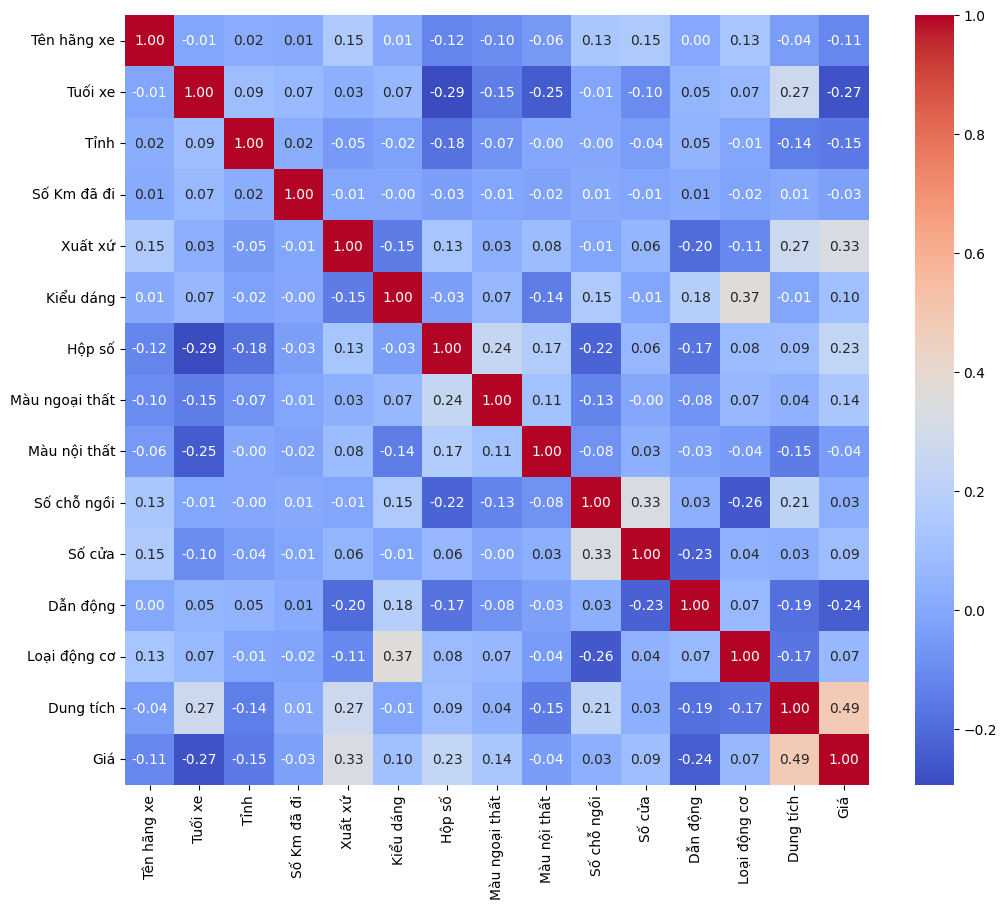

In [151]:
corr_matrix = encode_label(
    dataset, 
    columns=[
        "Tên hãng xe", "Tỉnh", "Xuất xứ", "Kiểu dáng", "Hộp số", 
        "Màu ngoại thất", "Màu nội thất", "Dẫn động", "Loại động cơ"
    ]
).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [152]:
# from sklearn.ensemble import RandomForestRegressor

# regressor = RandomForestRegressor(
#     max_depth=6, max_leaf_nodes=16, min_samples_split=10, min_samples_leaf=10
# )
# regressor.fit(X_train, y_train)
# y_pred = regressor.predict(X_test)
# _ = evaluate(y_pred, y_test.values)

In [153]:
# regressor.feature_importances_